In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

prng = np.random.RandomState(20240410)

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Science-Concepts/main/assignment3/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/szilvasipeter2000/Data-Science-Concepts/main/assignment3/data/test.csv')

In [4]:
# data table containing training data
train.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,is_popular,article_id
0,594,9,702,0.454545,1.0,0.620438,11,2,1,0,...,1.000000,-0.153395,-0.4,-0.10,0.0,0.0,0.5,0.0,0,1
1,346,8,1197,0.470143,1.0,0.666209,21,6,2,13,...,1.000000,-0.308167,-1.0,-0.10,0.0,0.0,0.5,0.0,0,3
2,484,9,214,0.618090,1.0,0.748092,5,2,1,0,...,0.433333,-0.141667,-0.2,-0.05,0.0,0.0,0.5,0.0,0,5
3,639,8,249,0.621951,1.0,0.664740,16,5,8,0,...,0.500000,-0.500000,-0.8,-0.40,0.0,0.0,0.5,0.0,0,6
4,177,12,1219,0.397841,1.0,0.583578,21,1,1,2,...,0.800000,-0.441111,-1.0,-0.05,0.0,0.0,0.5,0.0,0,7


In [5]:
# data table containing testing data without y (needs submission for evaluation)
test.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,article_id
0,134,11,217,0.631579,1.0,0.818966,4,2,2,0,...,0.136364,0.5,-0.170370,-0.200000,-0.155556,0.288889,-0.155556,0.211111,0.155556,2
1,415,11,1041,0.489423,1.0,0.700321,22,3,0,14,...,0.050000,1.0,-0.426268,-1.000000,-0.100000,0.975000,0.300000,0.475000,0.300000,4
2,625,9,486,0.599585,1.0,0.727273,4,3,1,0,...,0.062500,0.7,-0.387821,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,10
3,148,14,505,0.509018,1.0,0.718861,8,4,1,1,...,0.100000,1.0,-0.284722,-0.400000,-0.050000,0.000000,0.000000,0.500000,0.000000,13
4,294,14,274,0.620301,1.0,0.726190,5,1,1,0,...,0.100000,0.6,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000,26


# Explonatary Data Analysis

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      29733 non-null  int64  
 1   n_tokens_title                 29733 non-null  int64  
 2   n_tokens_content               29733 non-null  int64  
 3   n_unique_tokens                29733 non-null  float64
 4   n_non_stop_words               29733 non-null  float64
 5   n_non_stop_unique_tokens       29733 non-null  float64
 6   num_hrefs                      29733 non-null  int64  
 7   num_self_hrefs                 29733 non-null  int64  
 8   num_imgs                       29733 non-null  int64  
 9   num_videos                     29733 non-null  int64  
 10  average_token_length           29733 non-null  float64
 11  num_keywords                   29733 non-null  int64  
 12  data_channel_is_lifestyle      29733 non-null 

All of our variables are numeric.

In [15]:
train.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [19]:
print(train.shape)
print(test.shape)

(29733, 61)
(9911, 60)


In [6]:
# check for empty cells
train.columns[train.isnull().any()]

Index([], dtype='object')

In [20]:
train.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,is_popular,article_id
count,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,...,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000,29733.000000
mean,355.645646,10.390812,545.008274,0.555076,1.005852,0.695432,10.912690,3.290788,4.524535,1.263546,...,0.757780,-0.259709,-0.520981,-0.107793,0.281878,0.069691,0.341427,0.155234,0.121649,19834.913530
std,214.288261,2.110135,469.358037,4.064572,6.039655,3.768796,11.316508,3.840874,8.213823,4.189080,...,0.247293,0.128488,0.290454,0.095672,0.323461,0.264379,0.188735,0.225066,0.326886,11432.376037
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.471400,1.000000,0.626126,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328704,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,0.000000,9965.000000
50%,342.000000,10.000000,409.000000,0.539894,1.000000,0.690566,8.000000,2.000000,1.000000,0.000000,...,0.800000,-0.252827,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,0.000000,19859.000000
75%,545.000000,12.000000,712.000000,0.609375,1.000000,0.755208,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186494,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,0.000000,29742.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,74.000000,111.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000,39643.000000


We don't have missing values

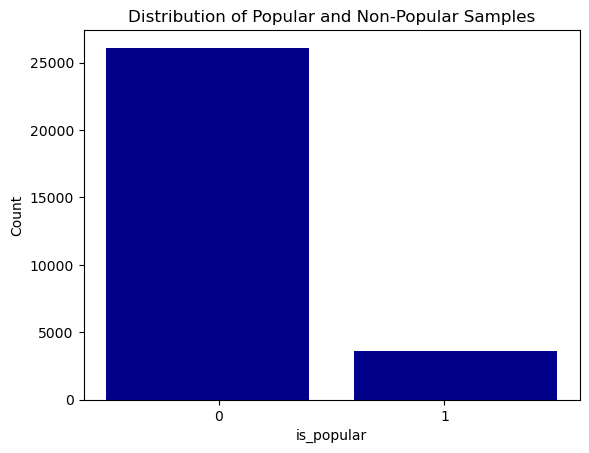

In [9]:
# let's look at our left-hand side variable
# Set ggplot style
train['is_popular'].hist(grid=False,color='darkblue',bins=[-0.5, 0.4,0.6, 1.5])

# Adding labels and title
plt.title('Distribution of Popular and Non-Popular Samples')
plt.xlabel('is_popular')
plt.ylabel('Count')

# Set x-ticks
plt.xticks([0, 1])

# Show plot
plt.show()

In [14]:
# what's the percentage of 1s
print(train['is_popular'].sum() / train['is_popular'].count())

0.12164934584468436


In [28]:
train.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

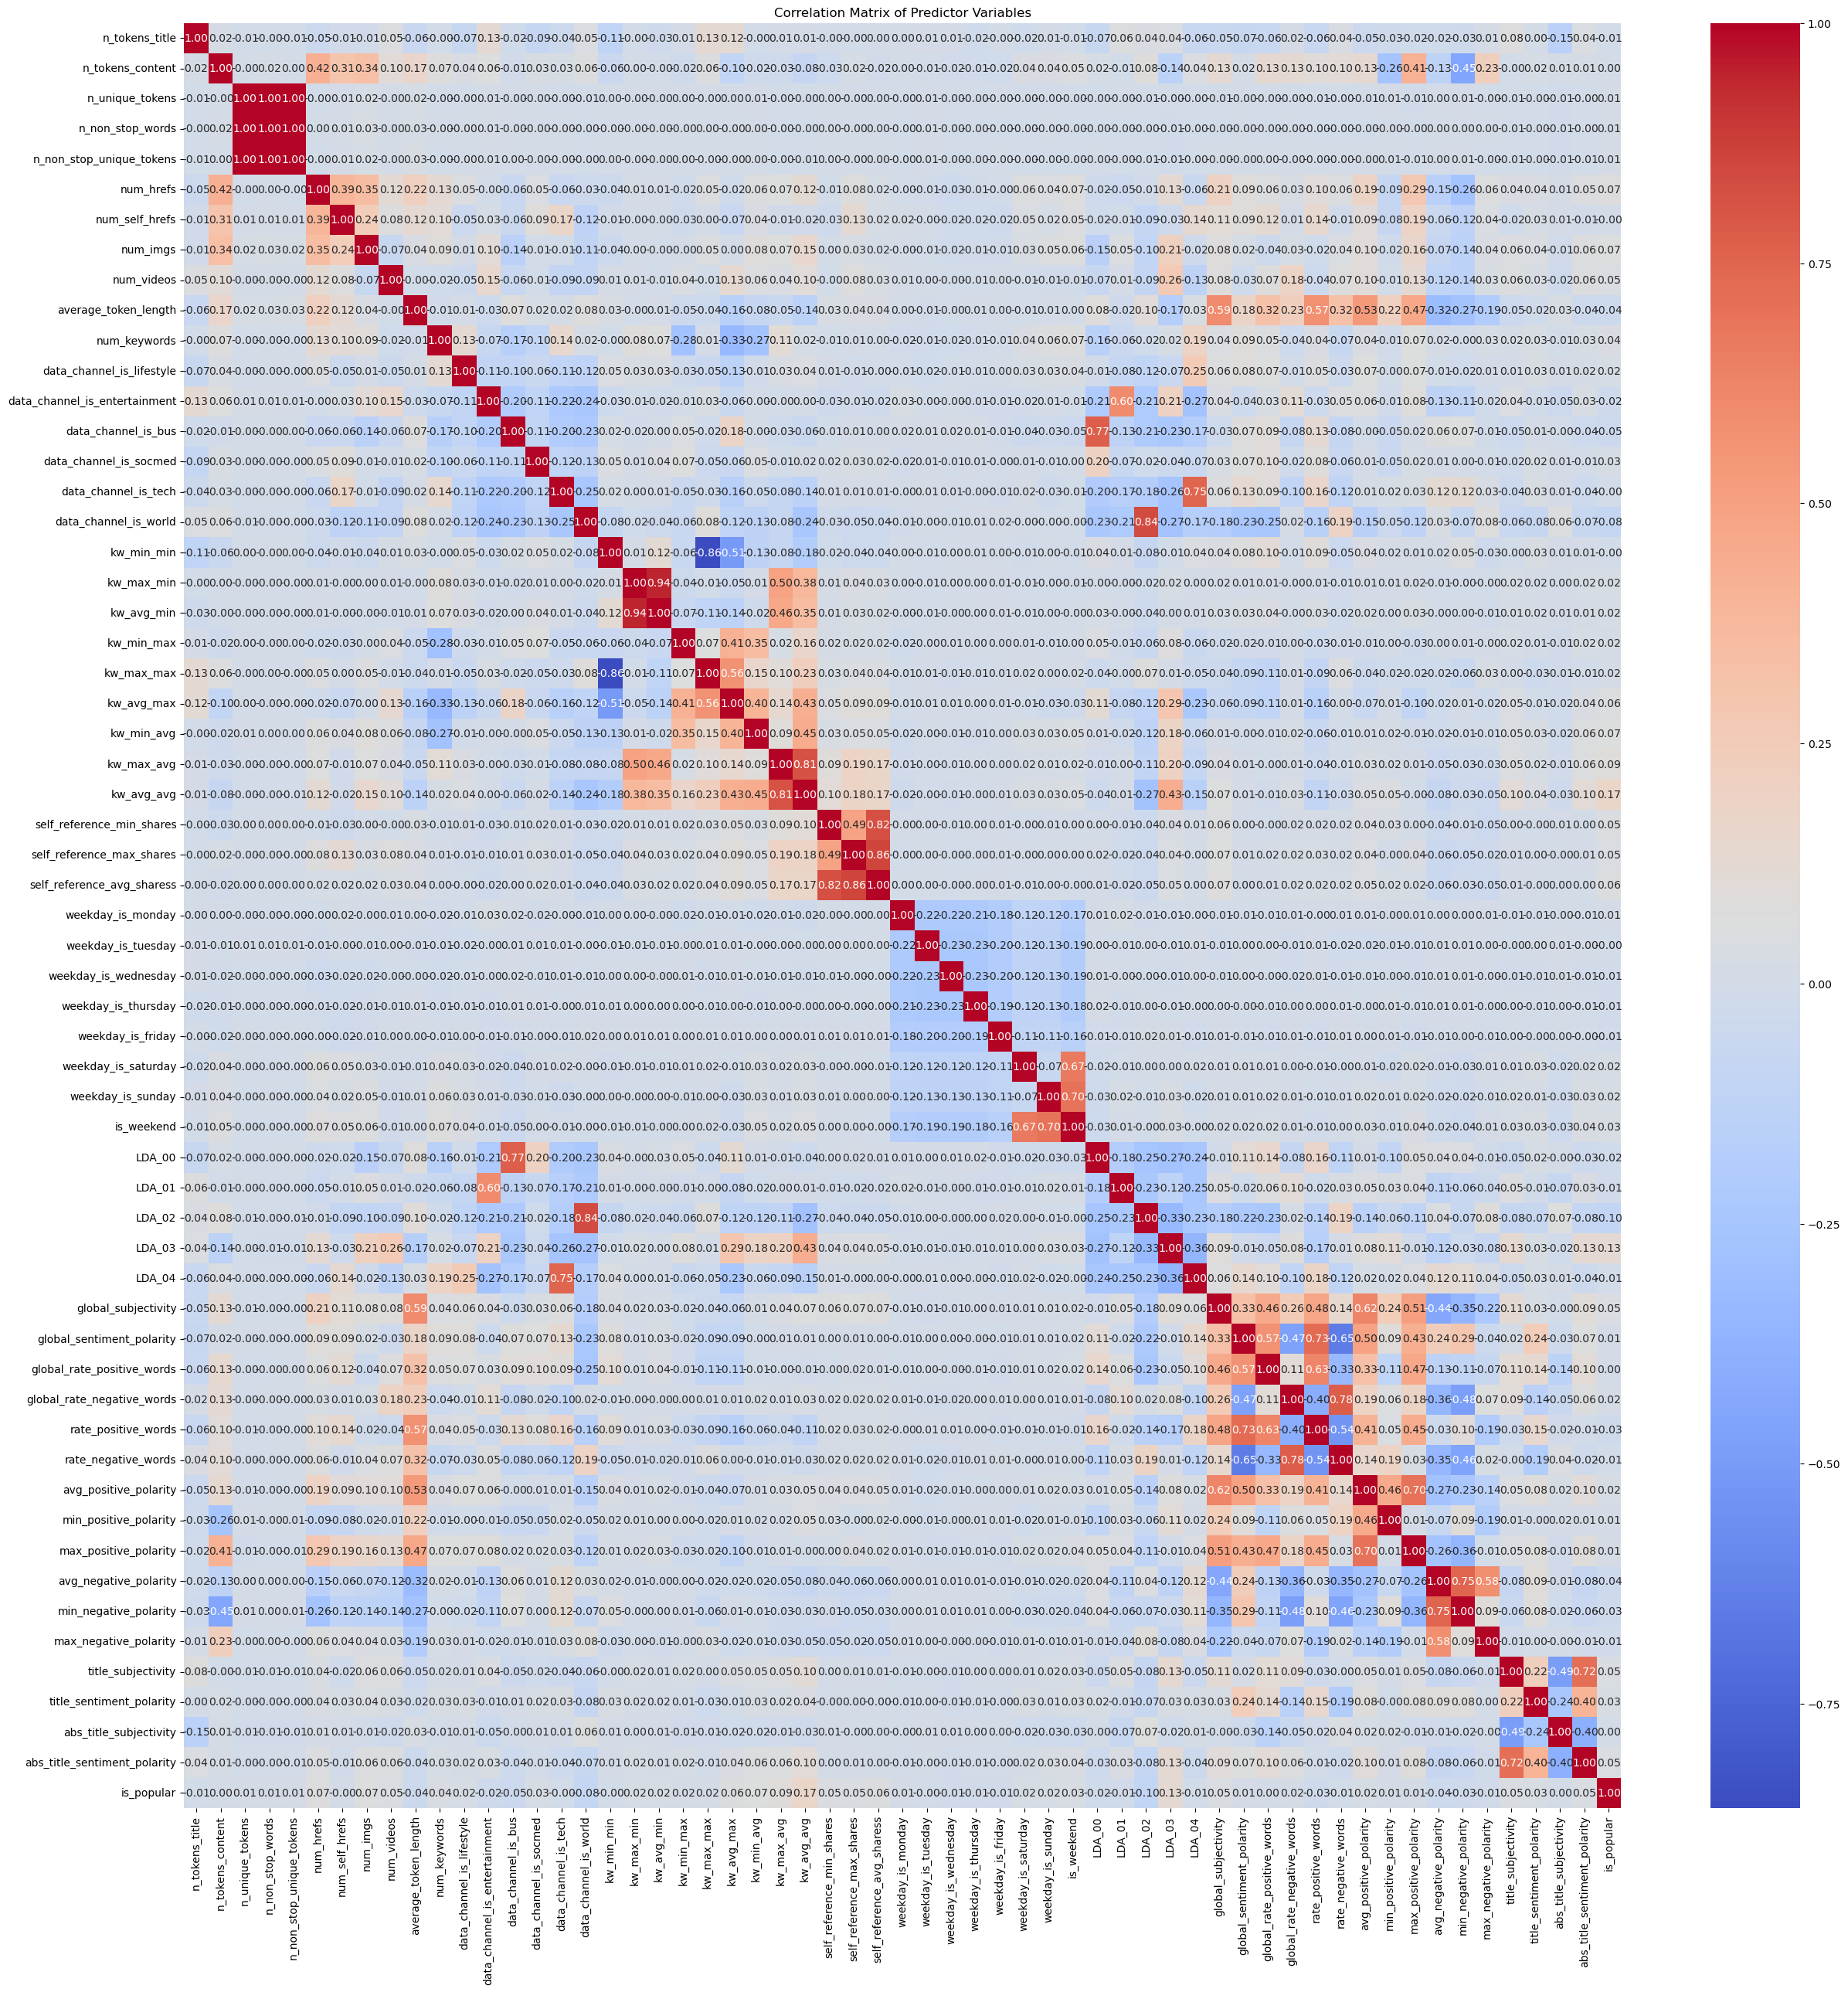

In [35]:
# let's look at our predictor variable

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

In [27]:
# Now, let's drop those columns which we can't use for predictions
train = train.drop(columns=['article_id','timedelta'])

In [ ]:
# winsorizing

# Benchmark Model
I will first create a Random Forest model to serve as my benchmark (no fine tuning, just a simple RF model). Based on my experiences, RF model performs the best, that's why i am choosing it.

In [38]:
y_train = train['is_popular']
x_train = train.drop(columns=['is_popular'])
x_test = test

In [8]:
# Benchmark simple Random Forest model
steps = [
    ("random_forest", RandomForestRegressor(random_state=prng))
]

pipe_rf = Pipeline(steps)

pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('random_forest',
                 RandomForestRegressor(random_state=RandomState(MT19937) at 0x1FD9CA73B40))])

In [9]:
# calculate train auc
y_train_pred = pipe_rf.predict(x_train)
print(roc_auc_score(y_train, y_train_pred))

1.0


In [10]:
# create funtion that takes a pipeline model as an input and creates the submission file needed to evaluate it on the test set
def create_submission_file(model):
    # use the x_test to predict the probabilities
    y_predicted = model.predict(x_test)
    # create a submission file with the same format as the submission sample file
    test_submission = pd.DataFrame({'article_id': x_test['article_id'],
                                    'score': y_predicted})

    return test_submission.to_csv('test_submission.csv',index=False)

In [11]:
create_submission_file(pipe_rf) # this achieves an accuracy of 0.6773 on the y_test

# Simple Linear Regression

In [46]:
# illustration on a single binary variable
from sklearn.linear_model import LinearRegression

lin_reg_simple_dummy = LinearRegression().fit(x_train[["average_token_length"]], y_train)
train_prediction = lin_reg_simple_dummy.predict(x_train[["average_token_length"]])
#test_prediction = lin_reg_simple_dummy.predict(x_test[["average_token_length"]])

In [47]:
print(roc_auc_score(y_train, train_prediction))

0.5384450409103927


# Random Forest Model

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define the parameter grid
param_grid = {
    "random_forest__n_estimators": [100, 200],
    "random_forest__max_depth": [5, 10, 20],
    "random_forest__min_samples_split": [2, 5, 10]
}

steps = [
    ("random_forest", RandomForestRegressor(random_state=prng))
]

pipe_rf = Pipeline(steps)

# Define AUC as the scoring metric
auc_scorer = make_scorer(roc_auc_score)

# Perform grid search with AUC as the scoring metric
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring=auc_scorer)
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

KeyboardInterrupt: 